# Naive Bayes

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Naive Bayes Classifier

$ P(A \mid B) = \frac{P(B \mid A) , P(A)}{P(B)} $

where:

* $P(A \mid B)$ — **posterior probability** (the probability of (A) given that (B) has occurred);
* $P(B \mid A)$ — **likelihood** (the probability of observing (B) if (A) is true);
* $P(A)$ — **prior probability** (the initial probability of (A));
* $P(B)$ — **evidence** or **marginal likelihood** (the total probability of observing (B)).

**Limitations:**

* Assumes **independence** between features.
* Performs poorly with **highly correlated attributes**.
* Works best with **1,000–10,000 attributes** and **1,000,000 or more rows**.

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [4]:
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.1f}%")
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 97.8%
Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



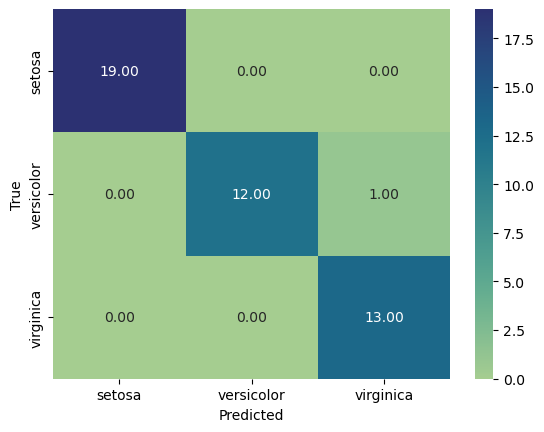

In [5]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt=".2f",
    cmap="crest",
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Naive Bayes Classifier on the Spam Email Dataset

[Spam Email Dataset on Kaggle](https://www.kaggle.com/datasets/prince7489/fitness-tracker-dataset)

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [7]:
df = pd.read_csv("../data/email.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df["Category"].value_counts()

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64

In [10]:
df = df[df["Category"] != '{"mode":"full"']
df["Category"].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [11]:
X = df["Message"].to_numpy()
y = df["Category"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
# vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

X_train_vec.data

array([1, 3, 1, ..., 1, 1, 1])

In [12]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

In [13]:
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.1f}%")
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=df["Category"].unique()))

Accuracy: 99.2%
Classification report:
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



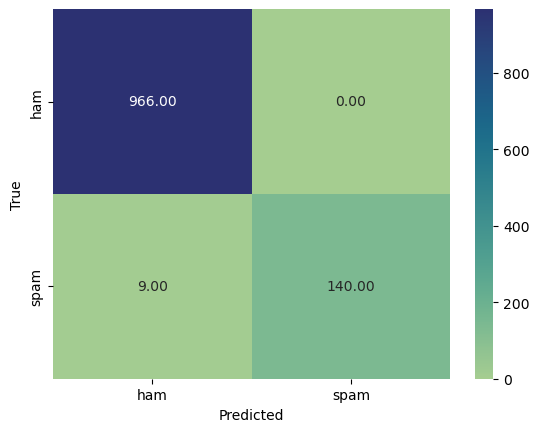

In [14]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt=".2f",
    cmap="crest",
    xticklabels=df["Category"].unique(),
    yticklabels=df["Category"].unique()
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()